In [15]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [16]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [17]:
# Get latitude and temperature for cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])
    
print(f"The latitude information we received was: {lat}")
print(f"The temperature information we received was: {temp}")
               


#for city in cities:
#    response = requests.get(query_url + city).json()
#    lat.append(response['coord']['lat'])
#    temp.append(response['main']['temp'])



#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")

The latitude information we received was: [48.85, 51.51, 59.91, 39.91, 19.01, 14.6, 40.71, 47.61, 32.77, 25.05]
The temperature information we received was: [11.28, 11.84, 8.38, 9.96, 29, 25, 18.58, 11.75, 30.56, 24.63]


In [18]:
# create a data frame from cities, lat, and temp

weather_data = pd.DataFrame({"Latitude": lat, "Temperature": temp})
weather_data


#weather_dict = {
#    "city": cities,
#    "lat": lat,
#    "temp": temp
#}
#weather_data = pd.DataFrame(weather_dict)
#weather_data

,Latitude,Temperature
0,48.85,11.28
1,51.51,11.84
2,59.91,8.38
3,39.91,9.96
4,19.01,29.00
5,14.60,25.00
6,40.71,18.58
7,47.61,11.75
8,32.77,30.56
9,25.05,24.63


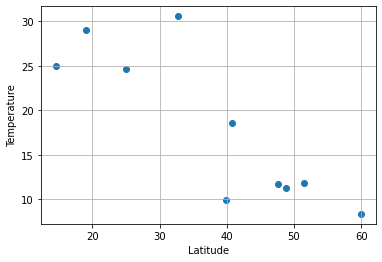

In [19]:
# Create a Scatter Plot for temperature vs. latitude
x_values = weather_data['Latitude']
y_values = weather_data['Temperature']
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()


In [20]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)


0    12.824960
1    11.533048
2     7.453326
3    17.166949
4    27.317686
5    29.459539
6    16.778404
7    13.427204
8    20.634713
9    24.384171
Name: Latitude, dtype: float64


In [21]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.49x +36.55


The r-squared value is0.71959586324805


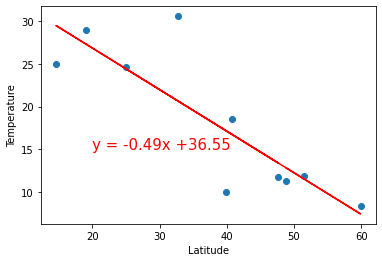

In [27]:
# Create Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq, (20, 15), fontsize=15, color ='red')
print(f"The r-squared value is{rvalue**2}")
plt.show()

# Print r square value


# Show plot


In [29]:
# Use the line equation to predict the temperature for Florence at a latitude of 43.77 degrees
florence_lat = 43.77
florence_predicted_temp = round(slope * florence_lat + intercept,2)

print(f"The predicted temperature for Florence is {florence_predicted_temp}.")


The predicted temperature for Florence is 15.29.


In [31]:
# Use API to determine actual temperature
reponse=requests.get(query_url + "Florence").json()
florence_actual_temp=response['main']['temp']

print(f"The actual temperature in Florence is {florence_actual_temp}")

The actual temperature in Florence is 24.63
